<a href="https://colab.research.google.com/github/Hassan-293/Feature-Engineering/blob/Hassan-Feature_Engineering/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd 
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

**Data Loading**

In [40]:
df= pd.read_csv('prosperLoanData.csv', engine='python',error_bad_lines=False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [12]:

data = np.nan_to_num(df)
print(df)

                    ListingKey  ListingNumber            ListingCreationDate  \
0      1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1      10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2      0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3      0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4      0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
...                        ...            ...                            ...   
93948  E52235368981208889E8D1B         553540  2012-01-22 19:31:25.083000000   
93949  E5233382782328625803A5C         105696  2007-03-02 16:41:20.900000000   
93950  E527360160300640225F84D        1186770  2014-02-04 13:51:45.363000000   
93951  E52B3558655864250BF4680         641783  2012-09-19 07:39:30.927000000   
93952  E52D3573502612216270A52         732408  2013-03-17 18:35:57.733000000   

      CreditGrade  Term  LoanStatus    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4145 entries, 0 to 4144
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingKey                           4145 non-null   object        
 1   ListingNumber                        4145 non-null   int64         
 2   ListingCreationDate                  4145 non-null   datetime64[ns]
 3   CreditGrade                          1020 non-null   object        
 4   Term                                 4145 non-null   int64         
 5   LoanStatus                           4145 non-null   object        
 6   ClosedDate                           1961 non-null   object        
 7   BorrowerAPR                          4144 non-null   float64       
 8   BorrowerRate                         4145 non-null   float64       
 9   LenderYield                          4145 non-null   float64       
 10  EstimatedEff

In [ ]:
df.dtypes #data types of the values

ListingKey                             object
ListingNumber                           int64
ListingCreationDate            datetime64[ns]
CreditGrade                            object
Term                                    int64
                                    ...      
PercentFunded                         float64
Recommendations                         int64
InvestmentFromFriendsCount              int64
InvestmentFromFriendsAmount           float64
Investors                               int64
Length: 81, dtype: object

**Data Cleaning**

In [ ]:
Null_Counts = df.isnull().sum()
print("The missing values in the each column are: ", Null_Counts)

The missing values in the each column are:  ListingKey                        0
ListingNumber                     0
ListingCreationDate               0
CreditGrade                    3125
Term                              0
                               ... 
PercentFunded                     0
Recommendations                   0
InvestmentFromFriendsCount        0
InvestmentFromFriendsAmount       0
Investors                         0
Length: 81, dtype: int64


In [ ]:
sns.heatmap(df.isnull(), yticklabels=False ,annot=True ) #heat map after Nulling the values

In [ ]:
df.dropna() #Dropping the Null Values

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [ ]:
drop_columns = df.dropna(axis=1)
drop_columns.head()   #Dropping the columns with null values

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerRate,LenderYield,ListingCategory (numeric),IsBorrowerHomeowner,CurrentlyInGroup,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,0.1580,0.1380,0,True,True,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,0.0920,0.0820,2,False,False,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,Completed,0.2750,0.2400,0,False,True,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,0.0974,0.0874,16,True,False,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,0.2085,0.1985,2,True,False,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [ ]:
print("Columns in orignal datasets: ", df.shape[1])
print("Columns after na's drop: ", drop_columns.shape[1])

Columns in orignal datasets:  81
Columns after na's drop:  38


In [ ]:
df.fillna(0) # filling the null values with zeros

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,0,36,Current,0,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,0,36,Current,0,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,0,36,Current,0,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,0,36,Current,0,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,0,36,FinalPaymentInProgress,0,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,0,60,Current,0,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,0,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [21]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])

In [22]:
df_loan = df[df['ProsperScore'].isnull()==False]

**Univariate Exploration**

Text(0.5, 0, 'Term (Months)')

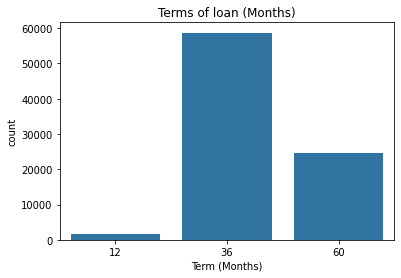

In [23]:
# Loan by term
base_color = sns.color_palette()[0]
sns.countplot(data=df_loan,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)')

In [24]:
type_count = df_loan['LoanStatus'].value_counts()
type_order = type_count.index


In [26]:
type_count


Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [ ]:
print(type_order)

Index(['Current', 'Completed', 'Chargedoff', 'Defaulted',
       'Past Due (1-15 days)', 'Past Due (91-120 days)',
       'Past Due (31-60 days)', 'Past Due (16-30 days)',
       'Past Due (61-90 days)', 'FinalPaymentInProgress'],
      dtype='object')


In [27]:
# Count of Loan by Loan Status
n_loan =df.shape[0]
max_type_count = type_count[0]
max_prop = max_type_count/n_loan

In [28]:
tick_props = np.arange(0,max_prop,0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

In [29]:
tick_names

['0.00', '0.10', '0.20', '0.30', '0.40']

**Data Visualization**

Text(0.5, 1.0, 'Proportion of Loan Status')

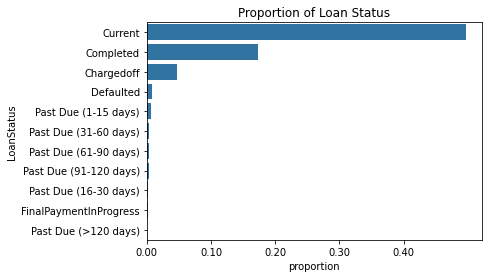

In [30]:
# Loan by term
sns.countplot(data=df_loan,y='LoanStatus',color=base_color,order=type_order);
plt.xticks(tick_props*n_loan,tick_names)
plt.xlabel('proportion');
plt.title('Proportion of Loan Status')

In [31]:
df['ProsperScore'].describe()

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

Text(0.5, 1.0, 'Count of Prosper ratings')

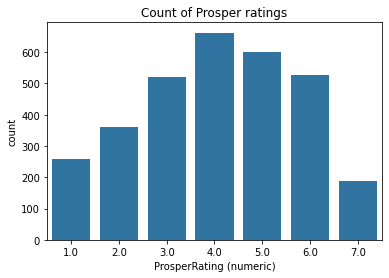

In [ ]:
# Distribution of Prosper rating
sns.countplot(data=df_loan,x='ProsperRating (numeric)',color=base_color);
plt.title('Count of Prosper ratings')

In [ ]:
df_loan['Year'] = df_loan['LoanOriginationQuarter'].str[-4:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


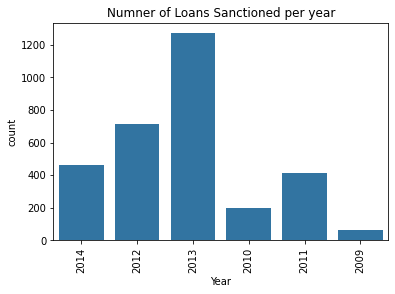

In [ ]:
# Number of loans per year
sns.countplot(data=df_loan,x='Year',color=base_color);
plt.title('Numner of Loans Sanctioned per year')
plt.xticks(rotation=90);

In [ ]:
df['LoanOriginalAmount'].describe()

count     4145.000000
mean      8423.761158
std       6341.677506
min       1000.000000
25%       4000.000000
50%       6500.000000
75%      12000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

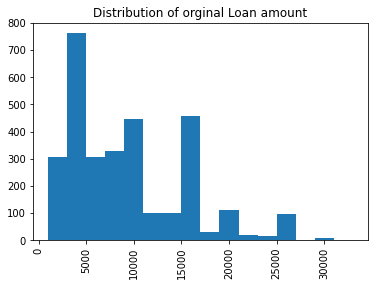

In [ ]:
# Distribution of orginal Loan amount
bins = np.arange(1000,35000,2000)
plt.hist(data=df_loan,x='LoanOriginalAmount',color=base_color,bins=bins);
plt.title('Distribution of orginal Loan amount')
plt.xticks(rotation=90);

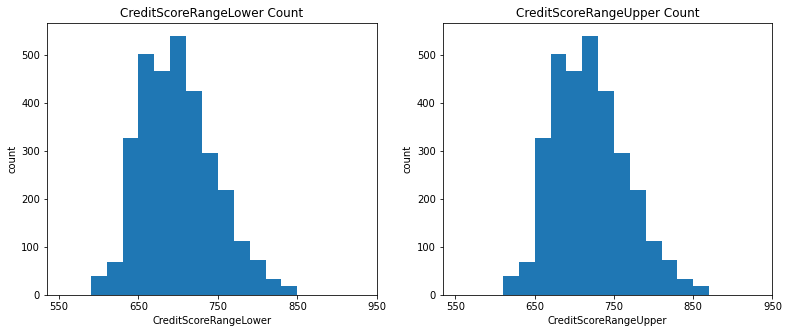

In [ ]:
# Histogram for Credit Score ranges

plt.figure(figsize = [13, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(550, df_loan['CreditScoreRangeLower'].max(), 20)
plt.hist(data = df_loan, x = 'CreditScoreRangeLower', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeLower Count')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(550, df_loan['CreditScoreRangeUpper'].max(), 20)
plt.hist(data = df_loan, x = 'CreditScoreRangeUpper', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('CreditScoreRangeUpper Count')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('count');

In [ ]:
df_loan['LenderYield'].describe()

count    3120.000000
mean        0.186825
std         0.074603
min         0.032500
25%         0.125900
50%         0.177500
75%         0.249900
max         0.340000
Name: LenderYield, dtype: float64

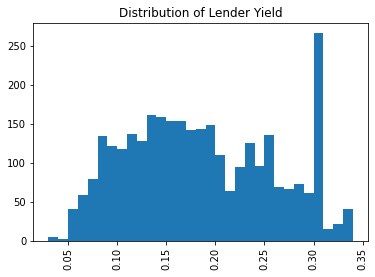

In [ ]:
# Distribution of lender yield
bins = np.arange(.03,.34,.01)
plt.hist(data=df_loan,x='LenderYield',color=base_color,bins=bins);
plt.title('Distribution of Lender Yield')
plt.xticks(rotation=90);

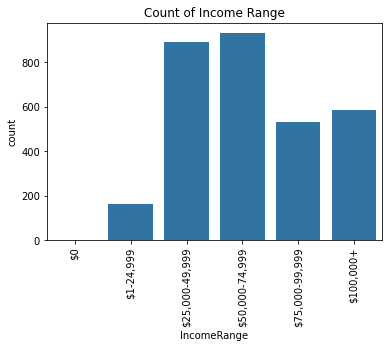

In [ ]:
# Income range of borrower
order = ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
sns.countplot(data=df_loan,x='IncomeRange',color=base_color,order=order);
plt.title('Count of Income Range')
plt.xticks(rotation=90);

**Correlation plot**

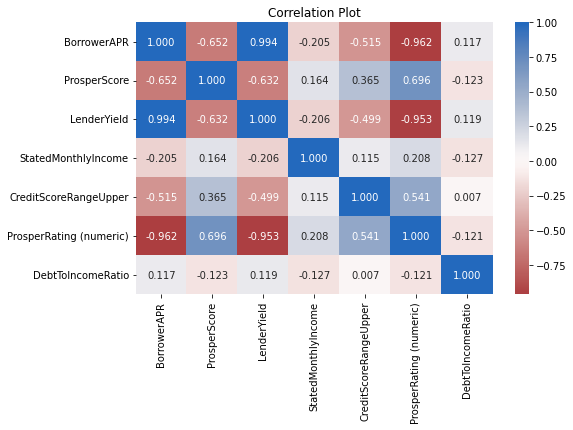

In [ ]:
num_vars = ['BorrowerAPR', 'ProsperScore', 'LenderYield', 
            'StatedMonthlyIncome',  'CreditScoreRangeUpper','ProsperRating (numeric)','DebtToIncomeRatio']
plt.figure(figsize = [8, 5])
sns.heatmap(df_loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

In [5]:
!apt install SelectKBest

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package SelectKBest


**Feature Engineering**

In [32]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = df['MonthlyLoanPayment'].mean () + df['MonthlyLoanPayment'].std () * factor
lower_lim = df['MonthlyLoanPayment'].mean () - df['MonthlyLoanPayment'].std () * factor

df = df[(df['MonthlyLoanPayment'] < upper_lim) & (df['MonthlyLoanPayment'] > lower_lim)]


In [33]:
#Dropping the outlier rows with Percentiles
upper_lim = df['MonthlyLoanPayment'].quantile(.95)
lower_lim = df['MonthlyLoanPayment'].quantile(.05)

df = df[(df['MonthlyLoanPayment'] < upper_lim) & (df['MonthlyLoanPayment'] > lower_lim)]

In [34]:
#Capping the outlier rows with Percentiles
upper_lim = df['MonthlyLoanPayment'].quantile(.95)
lower_lim = df['MonthlyLoanPayment'].quantile(.05)
df.loc[(df['MonthlyLoanPayment'] > upper_lim),'MonthlyLoanPayment'] = upper_lim
df.loc[(df['MonthlyLoanPayment'] < lower_lim),'MonthlyLoanPayment'] = lower_lim

**Binning of the Data**

In [35]:
df['bin'] = pd.cut(df['CreditScoreRangeLower'], bins=[0,200,600,1000], labels=["Low", "Mid", "High"])
print(df['bin'].head(100))


0      High
1      High
2       Mid
3      High
4      High
       ... 
105    High
106    High
107    High
108    High
109    High
Name: bin, Length: 100, dtype: category
Categories (3, object): ['Low' < 'Mid' < 'High']


In [42]:
print(df['StatedMonthlyIncome'].min())

print(df['StatedMonthlyIncome'].max())

print(df['StatedMonthlyIncome'].mean())


0.0
1750002.916667
5608.025568224852


In [19]:
df['bin'] = pd.cut(df['StatedMonthlyIncome'], bins=[0,5000,41666.666667], labels=['Will return','Not return'])

In [20]:
print(df['bin'])

0       Will return
1        Not return
2       Will return
3       Will return
5        Not return
           ...     
2758     Not return
2759    Will return
2760    Will return
2762    Will return
2763     Not return
Name: bin, Length: 2206, dtype: category
Categories (2, object): ['Will return' < 'Not return']


**Logarithmic Function**
As we see that the employee status can be very effective and diffrence in the magnitube varies, so we wil use Logarithmic Process

In [12]:
df['log+1'] = (df['EmploymentStatusDuration']+1).transform(np.log)
df['log'] = (df['EmploymentStatusDuration']-df['EmploymentStatusDuration'].min()+1) .transform(np.log)
df['log+1']


0         1.098612
1         3.806662
2              NaN
3         4.736198
4         3.806662
            ...   
113932    5.509388
113933    3.091042
113934    4.442651
113935    4.553877
113936    5.501258
Name: log+1, Length: 113937, dtype: float64

In [11]:

df['log']

0         1.098612
1         3.806662
2              NaN
3         4.736198
4         3.806662
            ...   
113932    5.509388
113933    3.091042
113934    4.442651
113935    4.553877
113936    5.501258
Name: log, Length: 113937, dtype: float64

In [13]:
df.DateCreditPulled

0         2007-08-26 18:41:46.780000000
1                   2014-02-27 08:28:14
2         2007-01-02 14:09:10.060000000
3                   2012-10-22 11:02:32
4                   2013-09-14 18:38:44
                      ...              
113932              2013-04-14 05:54:58
113933              2011-11-03 20:42:53
113934              2013-12-13 05:49:15
113935              2011-11-14 13:18:24
113936              2014-01-15 09:27:40
Name: DateCreditPulled, Length: 113937, dtype: object

**Feature Splitting**

In [38]:
import pandas as pd
df = pd.DataFrame({'DateCreditPulled':pd.date_range('8/26/2007  6:41:47 PM',periods=6)})
print("DataFrame is:\n", df)
for d in df['DateCreditPulled']:
   df['Date'] = d.date()
   df['Time'] = d.time()
df

DataFrame is:
      DateCreditPulled
0 2007-08-26 18:41:47
1 2007-08-27 18:41:47
2 2007-08-28 18:41:47
3 2007-08-29 18:41:47
4 2007-08-30 18:41:47
5 2007-08-31 18:41:47


,DateCreditPulled,Date,Time
0,2007-08-26 18:41:47,2007-08-31,18:41:47
1,2007-08-27 18:41:47,2007-08-31,18:41:47
2,2007-08-28 18:41:47,2007-08-31,18:41:47
3,2007-08-29 18:41:47,2007-08-31,18:41:47
4,2007-08-30 18:41:47,2007-08-31,18:41:47
5,2007-08-31 18:41:47,2007-08-31,18:41:47


**Normalization**

In [45]:
df['normalized'] = (df['StatedMonthlyIncome'] - df['StatedMonthlyIncome'].min()) / (df['StatedMonthlyIncome'].max() - df['StatedMonthlyIncome'].min())
print(df['normalized'] )

0         0.001762
1         0.003500
2         0.001190
3         0.001643
4         0.005476
            ...   
113932    0.002476
113933    0.004595
113934    0.001643
113935    0.002214
113936    0.002619
Name: normalized, Length: 113937, dtype: float64


**Standardization**

In [48]:
df['standardized'] = (df['StatedMonthlyIncome'] - df['StatedMonthlyIncome'].mean()) / df['StatedMonthlyIncome'].std()
df['standardized']

0        -0.337594
1         0.069128
2        -0.471310
3        -0.365451
4         0.531565
            ...   
113932   -0.170448
113933    0.325418
113934   -0.365451
113935   -0.231734
113936   -0.137018
Name: standardized, Length: 113937, dtype: float64